<a href="https://colab.research.google.com/github/wanruu/CS5487/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.model_selection import RepeatedKFold


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import contingency_matrix

import matplotlib.pyplot as plt
import tqdm

In [2]:
vecs=np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/digits4000_txt/digits4000_digits_vec.txt')
labels=np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/digits4000_txt/digits4000_digits_labels.txt')
train_data=vecs[:2000]
test_data=vecs[2000:]
train_label=labels[:2000]
test_label=labels[2000:]

100%|██████████| 50/50 [00:35<00:00,  1.42it/s]


[7, 0.938, 0.9185]


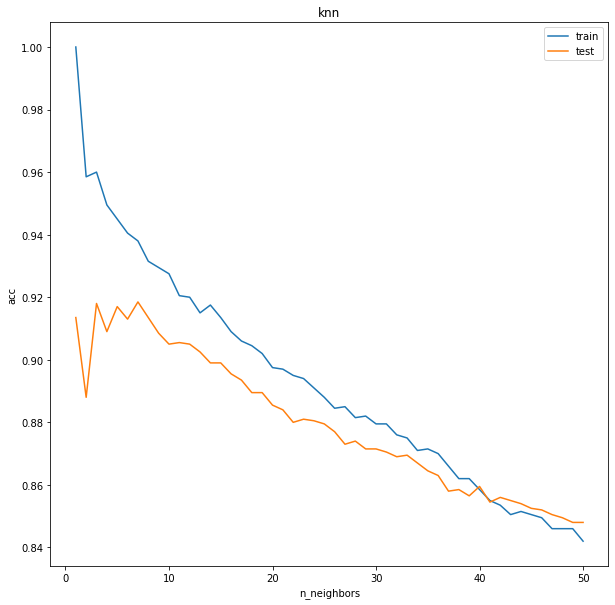

In [ ]:
train_data=vecs[:2000]
test_data=vecs[2000:]
train_label=labels[:2000]
test_label=labels[2000:]
train_data, train_label = shuffle(train_data, train_label, random_state=123)
test_data, test_label = shuffle(test_data, test_label, random_state=123)
#search the best hyperparameter
knn_n=[]
knn_train_acc=[]
knn_test_acc=[]
for i in tqdm.tqdm(range(50)):
  classifier = KNeighborsClassifier(n_neighbors=i+1)  
  classifier.fit(train_data, train_label)
  knn_n.append(i+1)
  knn_train_acc.append(classifier.score(train_data, train_label))
  knn_test_acc.append(classifier.score(test_data, test_label))

plt.figure(figsize=(10, 10))
plt.plot(knn_n,knn_train_acc,label='train')
plt.plot(knn_n,knn_test_acc,label='test')
plt.xlabel('n_neighbors')
plt.ylabel('acc')
plt.title('knn')
plt.legend()
plt.show

#best knn
idx=knn_test_acc.index(max(knn_test_acc))
print([knn_n[idx],knn_train_acc[idx],max(knn_test_acc)])

In [12]:
#trail 2
train_data=vecs[2000:]
test_data=vecs[:2000]
train_label=labels[2000:]
test_label=labels[:2000]

train_data, train_label = shuffle(train_data, train_label, random_state=123)
test_data, test_label = shuffle(test_data, test_label, random_state=123)

classifier = KNeighborsClassifier(7)
classifier.fit(train_data, train_label)


print('train_acc')
print(classifier.score(train_data, train_label))# train_acc
print('test_acc')
print(classifier.score(test_data, test_label))# test_acc


train_acc
0.9375
test_acc
0.909


100%|██████████| 200/200 [02:20<00:00,  1.43it/s]


[43, 0.953, 0.9345]


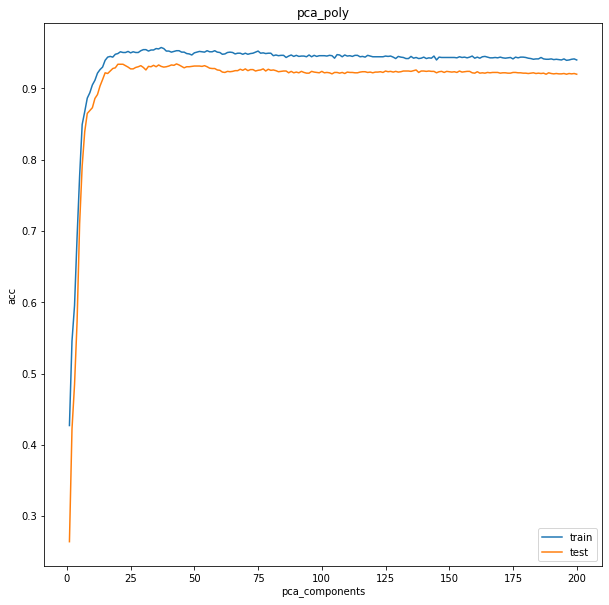

In [ ]:
#pca_knn

pca_components=[]
pca_train_acc=[]
pca_test_acc=[]
for i in tqdm.tqdm(range(200)):
  #pca with i+1 eigenvalues
  pca_component=i+1
  pca = PCA(n_components=pca_component)
  pca_train_data = pca.fit_transform(train_data)
  pca_test_data = pca.transform(test_data)

  #shuffle
  pca_train_data, pca_train_label = shuffle(pca_train_data, train_label, random_state=123)
  pca_test_data, pca_test_label = shuffle(pca_test_data, test_label, random_state=123)
  
  classifier = KNeighborsClassifier(7)
  classifier.fit(pca_train_data, pca_train_label)

  pca_components.append(pca_component)# # of eigenvalues
  pca_train_acc.append(classifier.score(pca_train_data, pca_train_label))# train_acc
  pca_test_acc.append(classifier.score(pca_test_data, pca_test_label))# test_acc


plt.figure(figsize=(10, 10))
plt.plot(pca_components,pca_train_acc,label='train')
plt.plot(pca_components,pca_test_acc,label='test')
plt.xlabel('pca_components')
plt.ylabel('acc')
plt.title('pca_poly')
plt.legend()
plt.show

#best pca
idx=pca_test_acc.index(max(pca_test_acc))
print([pca_components[idx],pca_train_acc[idx],max(pca_test_acc)])

In [5]:
#trail 2
train_data=vecs[2000:]
test_data=vecs[:2000]
train_label=labels[2000:]
test_label=labels[:2000]

pca_component=43
  
pca = PCA(n_components=pca_component)
pca_train_data = pca.fit_transform(train_data)
pca_test_data = pca.transform(test_data)

#shuffle
pca_train_data, pca_train_label = shuffle(pca_train_data, train_label, random_state=123)
pca_test_data, pca_test_label = shuffle(pca_test_data, test_label, random_state=123)
  
  #svm with 'rbf' kernel C=4
  #svm with 'poly' kernel C=10
  #svm with 'sigmoid' kernel C=0.4
  #svm with 'linear' kernel C=any
classifier = KNeighborsClassifier(7)
classifier.fit(pca_train_data, pca_train_label)


print('train_acc')
print(classifier.score(pca_train_data, pca_train_label))# train_acc
print('test_acc')
print(classifier.score(pca_test_data, pca_test_label))# test_acc

train_acc
0.948
test_acc
0.925
